In [7]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.circuit.library import GroverOperator
from qiskit.utils import QuantumInstance

In [8]:
# Создаем квантовую схему с 3 кубитами и 3 классическими битами
qc = QuantumCircuit(3, 3)

# Кодируем состояние |1⟩ на трех кубитах
qc.x(0)  # Устанавливаем первый кубит в состояние |1>
qc.cx(0, 1)  # Применяем CNOT к второму кубиту
qc.cx(0, 2)  # Применяем CNOT к третьему кубиту

# Вводим ошибку на втором кубите
qc.x(1)

# Декодируем и обнаруживаем ошибку
qc.cx(0, 1)  # Применяем CNOT к второму кубиту
qc.cx(0, 2)  # Применяем CNOT к третьему кубиту
qc.ccx(1, 2, 0)  # Применяем управляемый Тоффоли (ccx) для исправления ошибки

# Измеряем кубиты
qc.measure([0, 1, 2], [0, 1, 2])

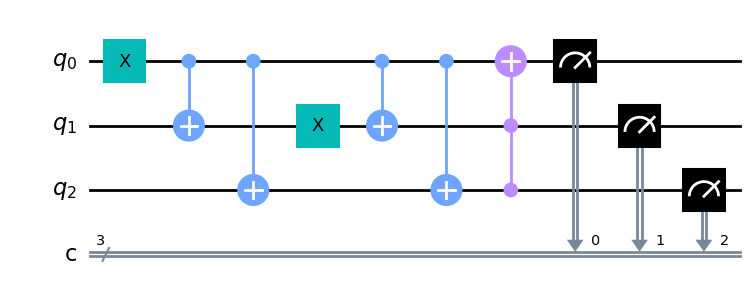

In [9]:
# Визуализируем квантовую схему
qc.draw("mpl")  # Отображаем схему в формате matplotlib

In [10]:
# Настраиваем симулятор
simulator = Aer.get_backend('qasm_simulator')

# Исполняем схему на симуляторе
job = execute(qc, simulator, shots=1024)
result = job.result()

# Получаем результаты и строим гистограмму
counts = result.get_counts(qc)
print("Результаты для кода коррекции ошибок:", counts)
plot_histogram(counts)
plt.show()


Результаты для кода коррекции ошибок: {'011': 1024}
